# 07. Искусственные нейронные сети

## Полносвязная сеть прямого распространения

### Данные и предобработка

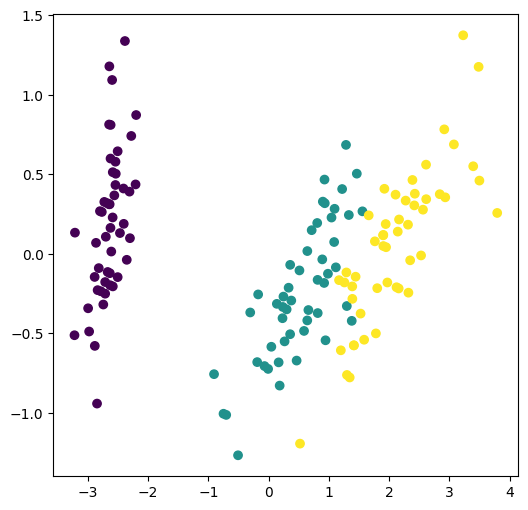

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
iris = load_iris()

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X = pca.fit_transform(iris['data'])
y = iris['target']

plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

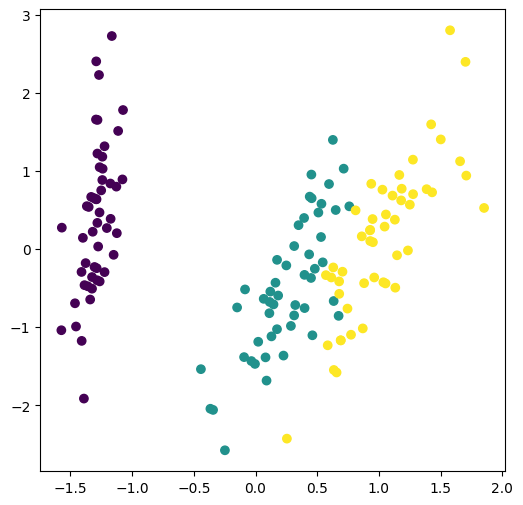

In [ ]:
from sklearn.preprocessing import StandardScaler
X_scale = StandardScaler()
X_ = X_scale.fit_transform(X)

plt.figure(figsize=(6, 6))
plt.scatter(X_[:, 0], X_[:, 1], c=y)
plt.show()

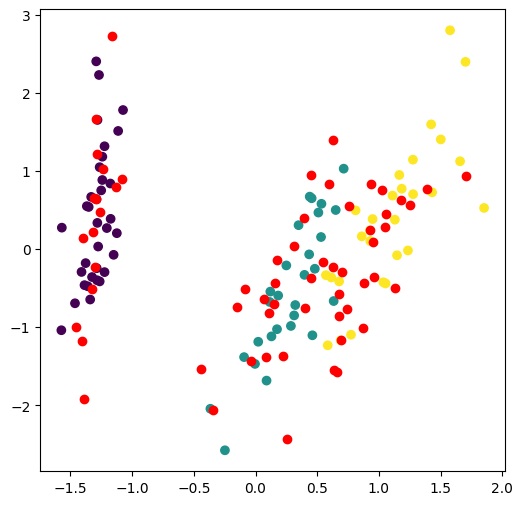

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.4)


plt.figure(figsize=(6, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.scatter(X_test[:, 0], X_test[:, 1], c='red')
plt.show()

### Классификация нейронными сетями

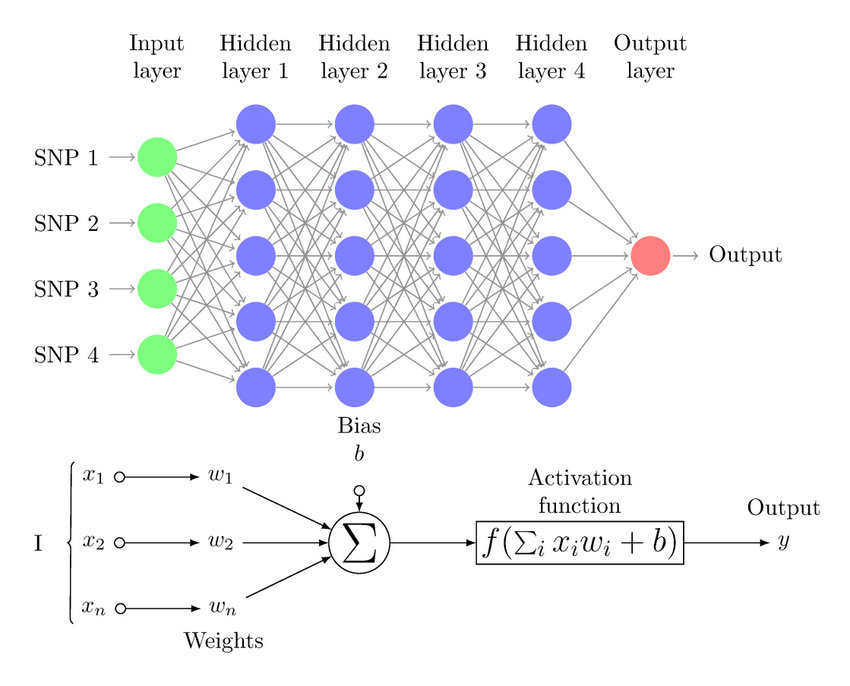

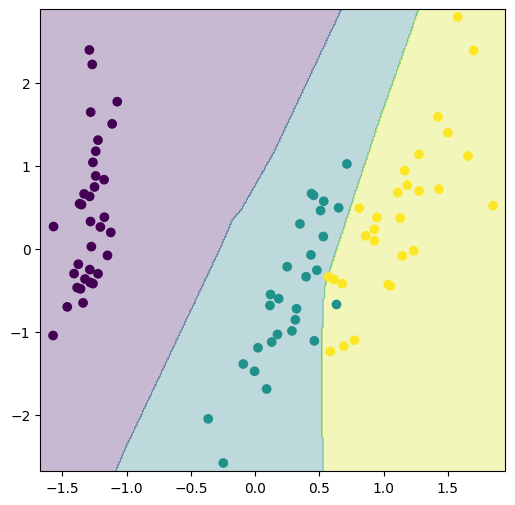

Достоверность:  0.95


In [ ]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(6,6), max_iter=1000).fit(X_train, y_train)

###################### код для построения графика

x_min, x_max = X_[:, 0].min() - .1, X_[:, 0].max() + .1
y_min, y_max = X_[:, 1].min() - .1, X_[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .01), np.arange(y_min, y_max, .01))

plt.figure(figsize=(6, 6))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.xlim(xx.min(), xx.max())

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.show()

###################### код для вычисления достоверности классификатора

from sklearn.metrics import accuracy_score
print ('Достоверность: ',
       accuracy_score(model.predict(X_test), y_test))

# Домашние задания

import matplotlib.pyplot as plt
import numpy as np1) Классификация с помощью нейронных сетей

1. Разбить датасет digits на обучающую и тестовую выборку, 85% и 15% соответственно.
2. Подберите минимальное значение параметров нейронной сети (количество скрытых слоев и количество нейронов на этих слоях), чтобы достоверность классификации была не меньше 97%.
3. Выведите в графическом виде все примеры, **где ИНС ошиблась**.
4. Сравнить результат с классификацией датасета digits, предобработанного алгоритмом t-SNE.

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptro

Точность: 0.9778, Архитектура: (18,)
Лучшая архитектура: (18,) с точностью 0.9778


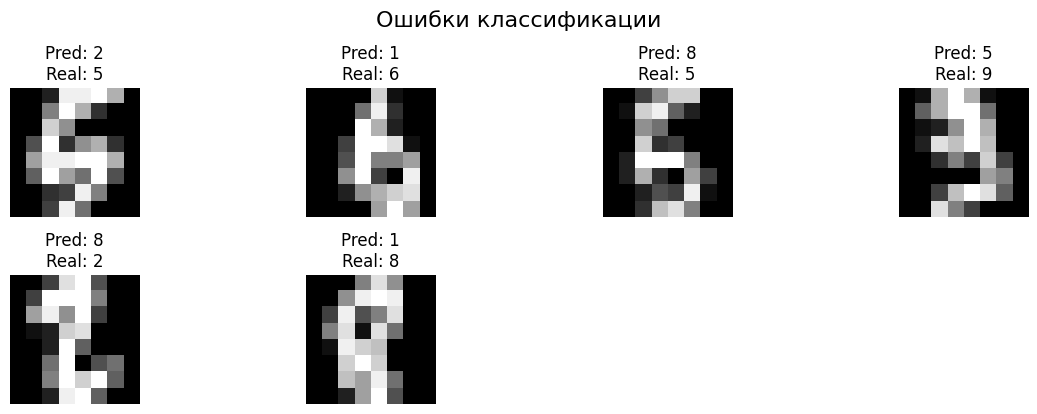

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

digits = datasets.load_digits()
print(digits)
X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=88)

best_accuracy = 0
best_params = None
misclassified_samples = []

for layers in range(1, 4):
    for neurons in range(5, 51):
        hidden_layer_sizes = tuple([neurons] * layers)
        model = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, random_state=88)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_params = hidden_layer_sizes
            misclassified_samples = [(X_test[i], y_pred[i], y_test[i]) for i in range(len(y_test)) if y_pred[i] != y_test[i]]
        if accuracy >= 0.97:
            print(f"Точность: {accuracy:.4f}, Архитектура: {hidden_layer_sizes}")
            break
    else:
        continue
    break

print(f"Лучшая архитектура: {best_params} с точностью {best_accuracy:.4f}")

plt.figure(figsize=(12, 8))
for i, (sample, pred, real) in enumerate(misclassified_samples):
    plt.subplot(4, 4, i + 1)
    plt.imshow(sample.reshape(8, 8), cmap='gray')
    plt.title(f"Pred: {pred}\nReal: {real}")
    plt.axis('off')
plt.suptitle("Ошибки классификации", fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

digits = datasets.load_digits()
X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=88)

tsne_train = TSNE(random_state=88)

X_train_tsne = tsne_train.fit_transform(X_train)

tsne_test = TSNE(random_state=88)

X_test_tsne = tsne_test.fit_transform(X_test)

best_accuracy = 0
best_params = None

for layers in range(1, 4):
    for neurons in range(1, 20):
        hidden_layer_sizes = tuple([neurons] * layers)
        model = MLPClassifier(
            hidden_layer_sizes=hidden_layer_sizes,
            max_iter=1000,
            early_stopping=True
        )
        scores = cross_val_score(model, X_train_tsne, y_train, cv=5)
        accuracy = scores.mean()

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_params = hidden_layer_sizes

        if accuracy >= 0.97:
            print(f"Точность (CV): {accuracy:.4f}, Архитектура: {hidden_layer_sizes}")
            break
    else:
        continue
    break

print(f"Лучшая архитектура: {best_params} с точностью (CV) {best_accuracy:.4f}")

model = MLPClassifier(hidden_layer_sizes=best_params, alpha=0.001, max_iter=1000)
model.fit(X_train_tsne, y_train)
y_pred = model.predict(X_test_tsne)
final_accuracy = accuracy_score(y_test, y_pred)
print(f"Точность на тестовых данных: {final_accuracy:.4f}")

Лучшая архитектура: (16, 16, 16) с точностью (CV) 0.8239
Точность на тестовых данных: 0.2364
